In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Configurar GPU (se disponível)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Baixar e extrair o dataset
dataset_url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_url, extract=True)
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


Num GPUs Available:  0
68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
IMG_SIZE = 160
BATCH_SIZE = 32

# Geradores de dados
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=train_dir,
    shuffle=True,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=BATCH_SIZE,
    directory=validation_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
# Carregar o MobileNetV2 pré-treinado
base_model = MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                         include_top=False,
                         weights='imagenet')

# Congelar as camadas do modelo base
base_model.trainable = False

# Adicionar novas camadas de classificação
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1, activation='sigmoid')
])

# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Visualizar a arquitetura do modelo
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           1,281 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 997ms/step - accuracy: 0.8538 - loss: 0.3462 - val_accuracy: 0.9560 - val_loss: 0.1214
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 77s 927ms/step - accuracy: 0.9643 - loss: 0.1033 - val_accuracy: 0.9590 - val_loss: 0.1000
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9734 - loss: 0.0707 - val_accuracy: 0.9590 - val_loss: 0.0934
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9828 - loss: 0.0539 - val_accuracy: 0.9600 - val_loss: 0.0923
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 976ms/step - accuracy: 0.9831 - loss: 0.0528 - val_accuracy: 0.9640 - val_loss: 0.0882
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 970ms/step - accuracy: 0.9889 - loss: 0.0415 - val_accuracy: 0.9630 - val_loss: 0.0873
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 993ms/step - accuracy: 0.9836 - loss: 0.0444 - val_accuracy: 0.9650 - val_loss: 0.0865
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.9908 - loss: 0.0309 - val_accuracy: 0.9620 - val_l

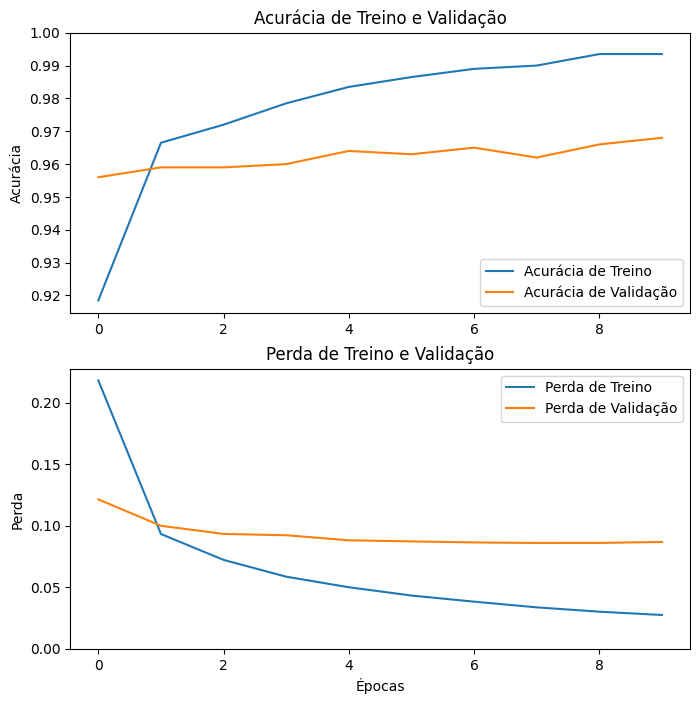

In [4]:
# Treinar o modelo
EPOCHS = 10

history = model.fit(
    train_data_gen,
    epochs=EPOCHS,
    validation_data=val_data_gen
)

# Visualizar os gráficos de acurácia e perda
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(range(EPOCHS), acc, label='Acurácia de Treino')
plt.plot(range(EPOCHS), val_acc, label='Acurácia de Validação')
plt.legend(loc='lower right')
plt.ylabel('Acurácia')
plt.ylim([min(plt.ylim()), 1])
plt.title('Acurácia de Treino e Validação')

plt.subplot(2, 1, 2)
plt.plot(range(EPOCHS), loss, label='Perda de Treino')
plt.plot(range(EPOCHS), val_loss, label='Perda de Validação')
plt.legend(loc='upper right')
plt.ylabel('Perda')
plt.ylim([0, max(plt.ylim())])
plt.title('Perda de Treino e Validação')
plt.xlabel('Épocas')
plt.show()


In [6]:
# Avaliar o modelo
loss, accuracy = model.evaluate(val_data_gen)
print(f'Acurácia no conjunto de validação: {accuracy*100:.2f}%')

# Salvar o modelo
model.save('cats_vs_dogs_classifier.h5')
model.save('cats_vs-dogs.keras')


32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 686ms/step - accuracy: 0.9687 - loss: 0.0868


Acurácia no conjunto de validação: 96.80%
